In [16]:
from PIL import Image
from typing import List, Tuple, Dict
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

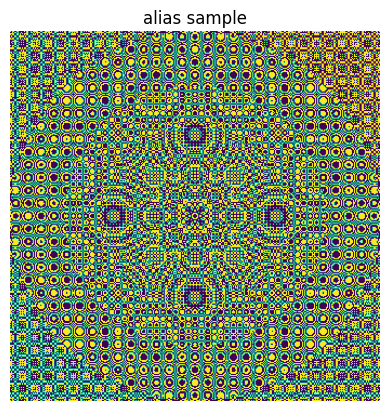

In [17]:
def load_image(image_path: str)-> np.ndarray:
    
    image: Image.Image = Image.open(image_path).convert("L")
    image_np: np.ndarray = np.array(image)
    
    return image_np

def plot_image(image:np.ndarray)-> None:
    plt.imshow(image)
    plt.title("alias sample")
    plt.axis("off")
    plt.show()



image_alias_sample: np.ndarray = load_image("alias_sample.png")
plot_image(image_alias_sample)



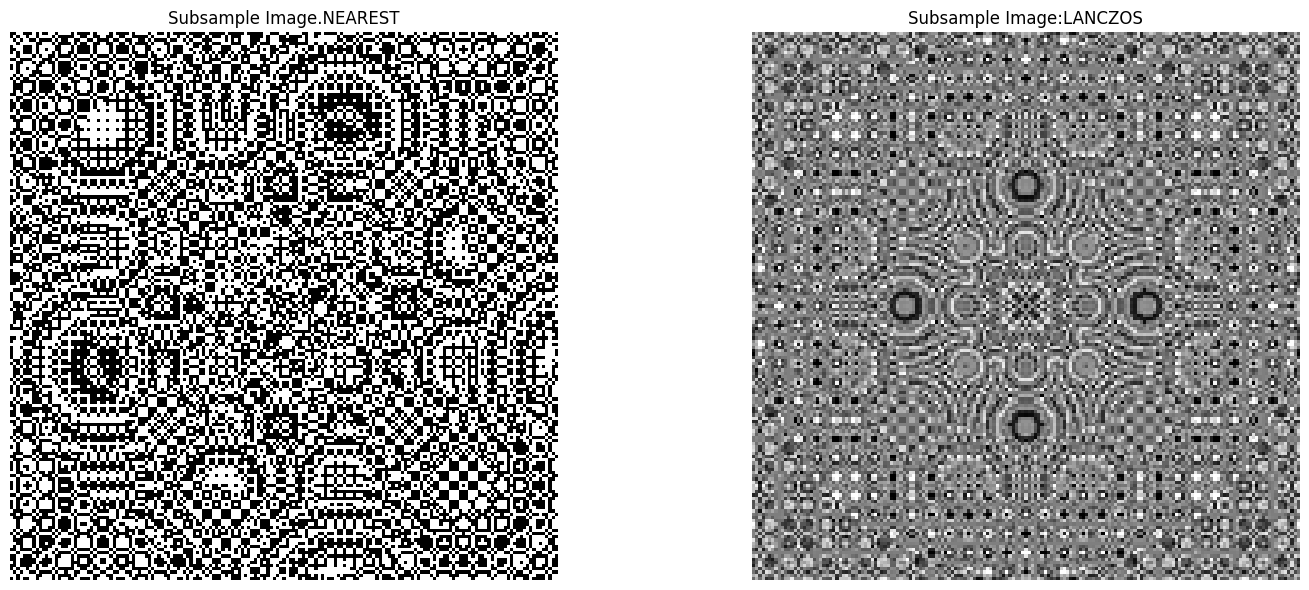

In [18]:
def sub_sample_images(image: np.ndarray, resample_size) -> np.ndarray:
    h, w = image.shape 
    half_h, half_w = h // 2, w // 2
    new_size = (half_w, half_h)  
    image_pil = Image.fromarray(image)
    image_filter = image_pil.resize(new_size, resample=resample_size)  
    return np.array(image_filter)

def plot_images(images: List[np.ndarray], titles: List[str]) -> None:
    fig, axes = plt.subplots(1, len(images), figsize=(16, 6)) 
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image, cmap="gray")
        ax.set_title(title)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Assuming image_alias_sample is a loaded NumPy array
sub_image_nearest = sub_sample_images(image_alias_sample, Image.NEAREST)
sub_image_lanczos = sub_sample_images(image_alias_sample, Image.LANCZOS)

plot_images([sub_image_nearest, sub_image_lanczos], ["Subsample Image.NEAREST", "Subsample Image:LANCZOS"])


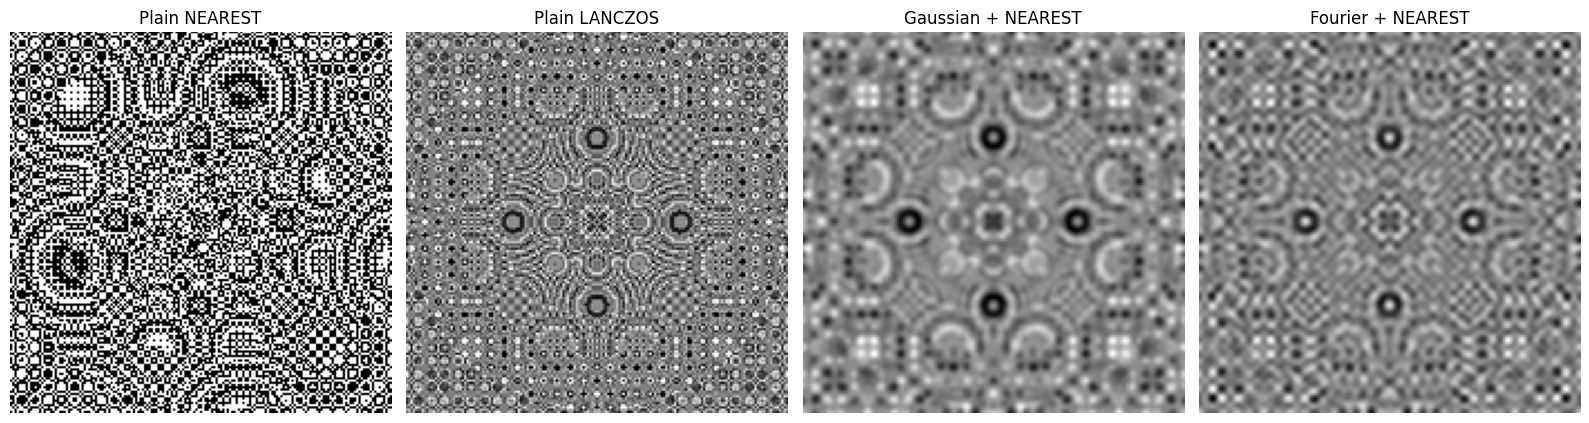

In [19]:
# Gaussian filter implementation
def apply_gaussian_filter(image: np.ndarray, sigma: float) -> np.ndarray:
    filtered_image = gaussian_filter(image, sigma=sigma)
    return filtered_image

# Fourier transform as a low-pass filter
def fft_shift(image: np.ndarray) -> np.ndarray:
    f_transform = np.fft.fft2(image)
    return np.fft.fftshift(f_transform)


def apply_low_pass_filter(shifted: np.ndarray, cutoff: int) -> np.ndarray:
    rows, cols = shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    return shifted * mask


def inverse_fft_shift(filtered: np.ndarray) -> np.ndarray:
    f_ishift = np.fft.ifftshift(filtered)
    filtered_image = np.fft.ifft2(f_ishift)
    return np.abs(filtered_image)


def apply_fourier_filter(image: np.ndarray, cutoff: int) -> np.ndarray:
    shifted = fft_shift(image)
    filtered = apply_low_pass_filter(shifted, cutoff)
    return inverse_fft_shift(filtered)

gaussian_image = apply_gaussian_filter(image_alias_sample, sigma=3)
sub_image_gaussian = sub_sample_images(gaussian_image, Image.NEAREST)

fourier_image = apply_fourier_filter(image_alias_sample, cutoff=30)
sub_image_fourier = sub_sample_images(fourier_image, Image.NEAREST)

plot_images([
    sub_image_nearest, sub_image_lanczos, sub_image_gaussian, sub_image_fourier
], [
    "Plain NEAREST", "Plain LANCZOS", "Gaussian + NEAREST", "Fourier + NEAREST"
])



# Comparison of Low-Pass Filters (Gaussian vs. Fourier)

- **Why do the images look different?**
  - The difference arises from the resampling methods (NEAREST vs. LANCZOS) and the low-pass filtering approaches (Gaussian vs. Fourier).
  - NEAREST resampling causes aliasing with blocky artifacts, while LANCZOS resampling preserves smooth transitions.
  - Gaussian filtering smooths the image by averaging, while Fourier filtering directly cuts off high frequencies.

- **Similarities between Low-Pass Filters:**
  - Both reduce high frequencies to minimize aliasing.
  - Both result in a visually smoother, blurred image.

- **Differences between Gaussian and Fourier Filters:**
  - **Gaussian Filter:** Applies a weighted average in the spatial domain, creating a soft, gradual blur.
  - **Fourier Filter:** Directly cuts off frequencies in the frequency domain, potentially causing ringing artifacts.
  - Gaussian is more natural for gradual transitions, while Fourier is more mathematical and can produce sharper, more defined low-pass effects.
